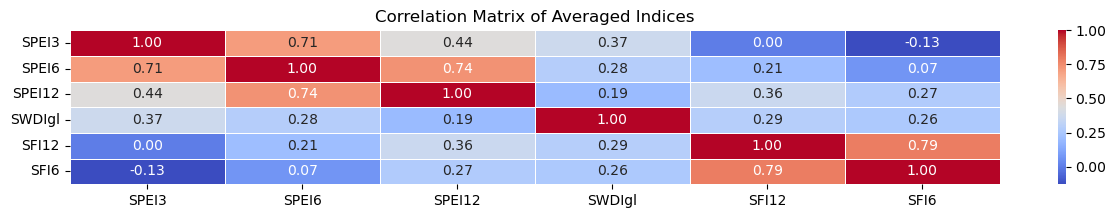

In [1]:
# Calculate the average values for SPEI 3, 6, 12, and SFI 6, 12 across all stations
# First, identify columns for each index across all stations
import pandas as pd
import matplotlib.pyplot as plt
df_new=pd.read_csv(r"C:/Users/Acer/Desktop/AWD/masterfileforcorrelationmonthly.csv")
spei3_columns = [col for col in df_new.columns if 'SPEI3' in col]
spei6_columns = [col for col in df_new.columns if 'SPEI6' in col]
spei12_columns = [col for col in df_new.columns if 'SPEI12' in col]
SWDIgl_columns = [col for col in df_new.columns if 'SWDIgl' in col]
sfi6_columns = [col for col in df_new.columns if 'sfi6' in col]
sfi12_columns = [col for col in df_new.columns if 'sfi12' in col]


# Calculate average for each index
average_spei3 = df_new[spei3_columns].mean(axis=1)
average_spei6 = df_new[spei6_columns].mean(axis=1)
average_spei12 = df_new[spei12_columns].mean(axis=1)
average_SWDIgl = df_new[SWDIgl_columns].mean(axis=1)
average_sfi6 = df_new[sfi6_columns].mean(axis=1)
average_sfi12 = df_new[sfi12_columns].mean(axis=1)

# Combine these averages into a single dataframe for correlation analysis
averages_df = pd.DataFrame({
    'SPEI3': average_spei3,
    'SPEI6':average_spei6,
    'SPEI12':average_spei12,
    'SWDIgl':average_SWDIgl,
    
    'SFI12': average_sfi12,
    'SFI6': average_sfi6
    
})

# Calculate the correlation matrix among these averaged indices
correlation_matrix = averages_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = averages_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Averaged Indices')
plt.show()




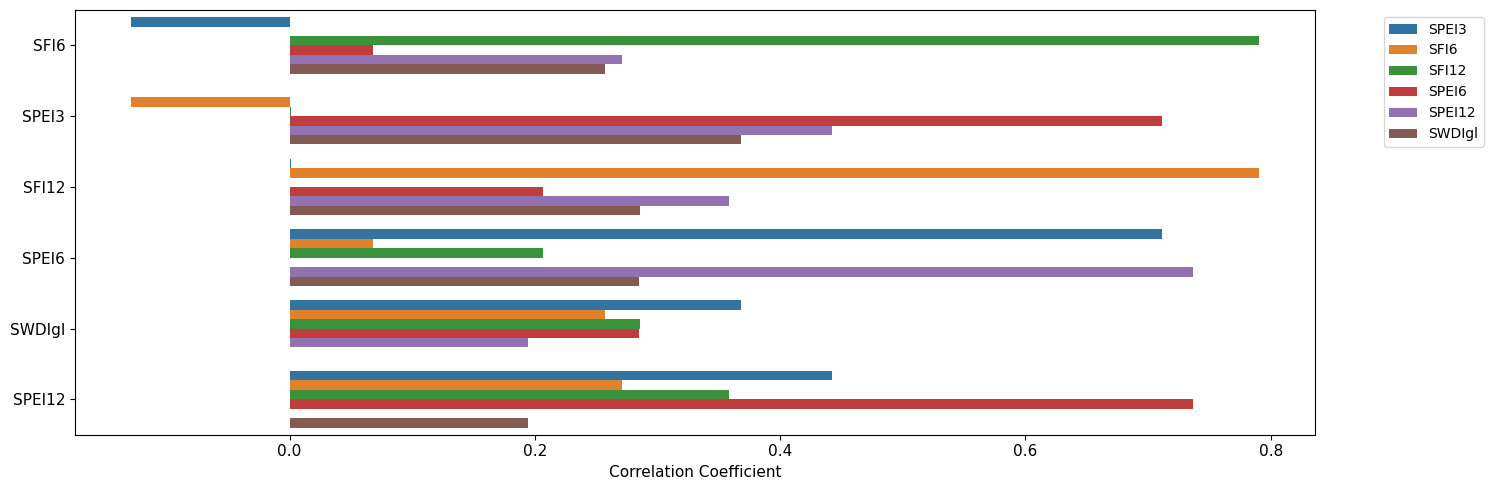

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using the correlation data calculated from the CSV file
# Prepare the data in the format suitable for bar plot similar to the provided example
# Custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
# Flatten the correlation matrix and reset index to convert to a suitable DataFrame
correlation_df = correlation_matrix.unstack().reset_index()
correlation_df.columns = ['Index1', 'Index2', 'Correlation']

# Filter out the self-correlation (i.e., correlation of an index with itself)
correlation_df_filtered = correlation_df[correlation_df['Index1'] != correlation_df['Index2']]

# Sort the values by correlation to have a better visual representation
correlation_df_sorted = correlation_df_filtered.sort_values(by='Correlation', ascending=True)

# Create a bar plot
plt.figure(figsize=(15, 5))
barplot = sns.barplot(
    x='Correlation',
    y='Index1',
    hue='Index2',
    data=correlation_df_sorted,
    palette=colors
)

#plt.title('Correlation Coefficients between SWDIgl and SPEI (3,6, 12 months)')
plt.xlabel('Correlation Coefficient', size =11)
plt.ylabel('', size = 20)
plt.legend(title='Index', loc='lower right')
plt.yticks(size=11)
plt.xticks(size=11)

# Remove the legend title (for aesthetics to match the example)
barplot.legend_.set_title(None)

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(r'C:\Users\Acer\Desktop\Manuscript edited plots\corr(SPEI vs SFI).png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()
